Ce notebook propose une analyse du Dataset 2a de la BCI Competition, qui comporte quatre classes : left hand (main gauche), right hand (main droite), tongue (langue) et feet (pieds). L'objectif est d'observer l'évolution des matrices de covariance des signaux à travers le temp.

<h1> A propos des données </h1>
Cet ensemble de données se compose de données EEG provenant de 9 sujets. Le paradigme BCI basé sur des indices se composait de quatre tâches d'imagerie motrice différentes, à savoir l'imagination du mouvement de la main gauche (classe 1), de la main droite (classe 2), des deux pieds (classe 3) et de la langue (classe 4). Deux sessions ont été enregistrées pour chaque sujet, à des jours différents. Chaque session est composée de 6 séquences séparées par de courtes pauses. Une séquence se compose de 48 essais (12 pour chacune des quatre classes possibles), ce qui donne un total de 288 essais par session.

Les sujets étaient assis dans un fauteuil confortable devant un écran d'ordinateur. Au début d'un essai (t = 0 s), une croix de fixation apparaissait sur l'écran noir. De plus, un bref signal sonore d'avertissement était présenté. Après deux secondes (t = 2 s), un indice sous forme d'une flèche pointant vers la gauche, la droite, le bas ou le haut (correspondant à l'une des quatre classes de la main gauche, de la main droite, du pied ou de la langue) apparaissait et restait sur l'écran pendant 1,25 s. Cela incitait les sujets à effectuer la tâche d'imagerie motrice désirée. Aucune rétroaction n'était fournie. Les sujets étaient invités à effectuer la tâche d'imagerie motrice jusqu'à ce que la croix de fixation disparaisse de l'écran à t = 6 s.

Vingt-deux électrodes Ag/AgCl (avec des distances inter-électrodes de 3,5 cm) ont été utilisées pour enregistrer l'EEG ; le montage est présenté dans la figure 3 à gauche. Tous les signaux ont été enregistrés de manière monopolaire, avec le mastoïde gauche comme référence et le mastoïde droit comme terre. Les signaux ont été échantillonnés à 250 Hz et filtrés en bande passante entre 0,5 Hz et 100 Hz. La sensibilité de l'amplificateur a été réglée à 100 μV. Un filtre coupe-bande supplémentaire à 50 Hz a été activé pour supprimer le bruit de ligne.

<h1>Importation et Prétraitement des Données :</h1> Les données de la première session du premier sujet sont chargées à partir du Dataset 2a. Les segments correspondant à chaque classe (left hand, right hand, tongue, feet) sont extraits de la  première session du premier run du premier sujet.

In [2]:
import mne
import moabb
import numpy as np
from moabb.datasets import BNCI2014_001

In [7]:
dataset = BNCI2014_001()

In [8]:
print(dataset.subject_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
dataset.subject_list = [1]

In [9]:
sessions = dataset.get_data(subjects=[1])

In [10]:
subject = 1
session_name = "0train"
run_name = "0"
raw = sessions[subject][session_name][run_name]

In [9]:
subject = 1
session_name = "0train"
run_name = "1"
raw_1 = sessions[subject][session_name][run_name]

In [25]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG, 1 Stimulus
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 26
 projs: []
 sfreq: 250.0 Hz
>


In [12]:
print(raw.get_data().shape)

(26, 96735)


In [13]:
print(raw.get_data())

[[ 3.41796875e-07 -6.34765625e-06 -1.80664062e-06 ...  2.92968750e-07
  -6.34765625e-06 -9.71679687e-06]
 [ 2.44140625e-07 -7.95898437e-06 -7.17773437e-06 ...  4.88281250e-08
  -5.12695312e-06 -7.17773437e-06]
 [-3.22265625e-06 -1.04980469e-05 -8.15429687e-06 ... -3.07617188e-06
  -9.71679687e-06 -1.39648438e-05]
 ...
 [ 2.05078125e-05  7.81250000e-06  1.36718750e-05 ...  4.58984375e-05
   3.85742188e-05  3.95507813e-05]
 [ 5.85937500e-06 -4.88281250e-06 -4.88281250e-07 ... -4.39453125e-06
  -4.39453125e-06 -1.07421875e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Using matplotlib as 2D backend.


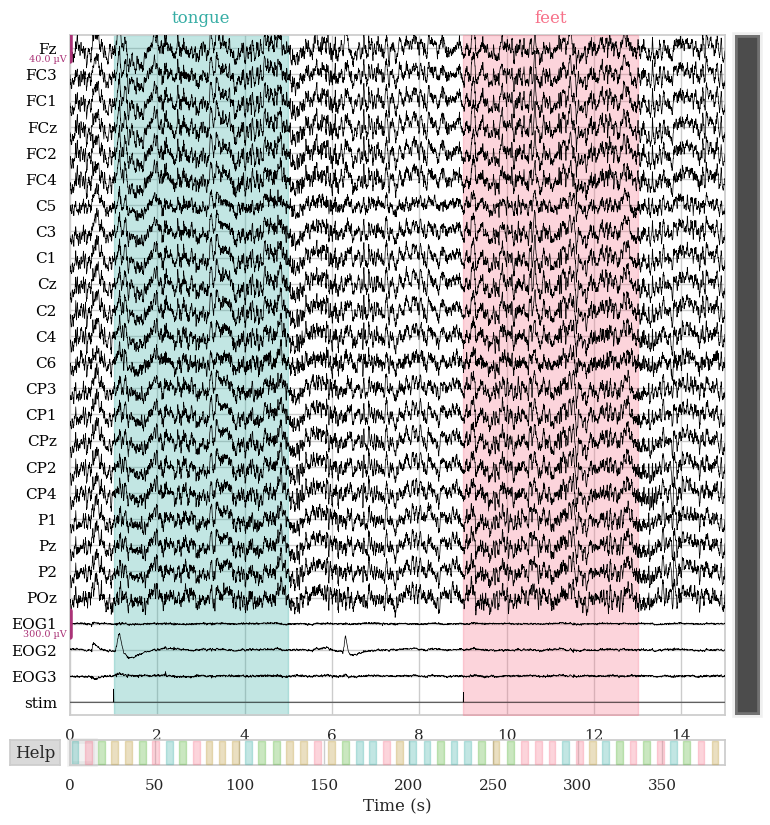

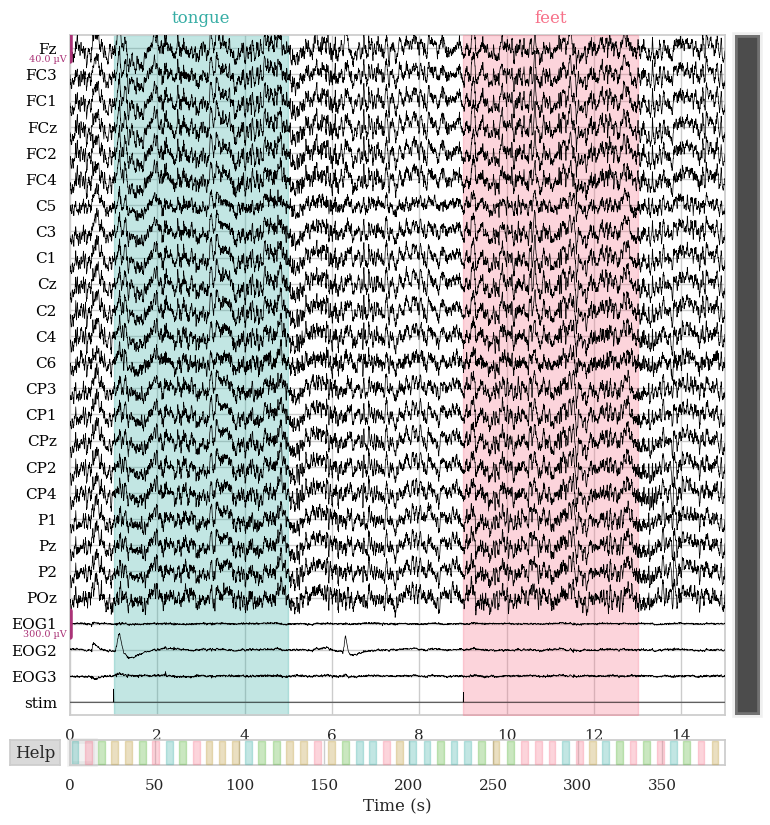

In [13]:
raw.plot(duration=15, n_channels=26)

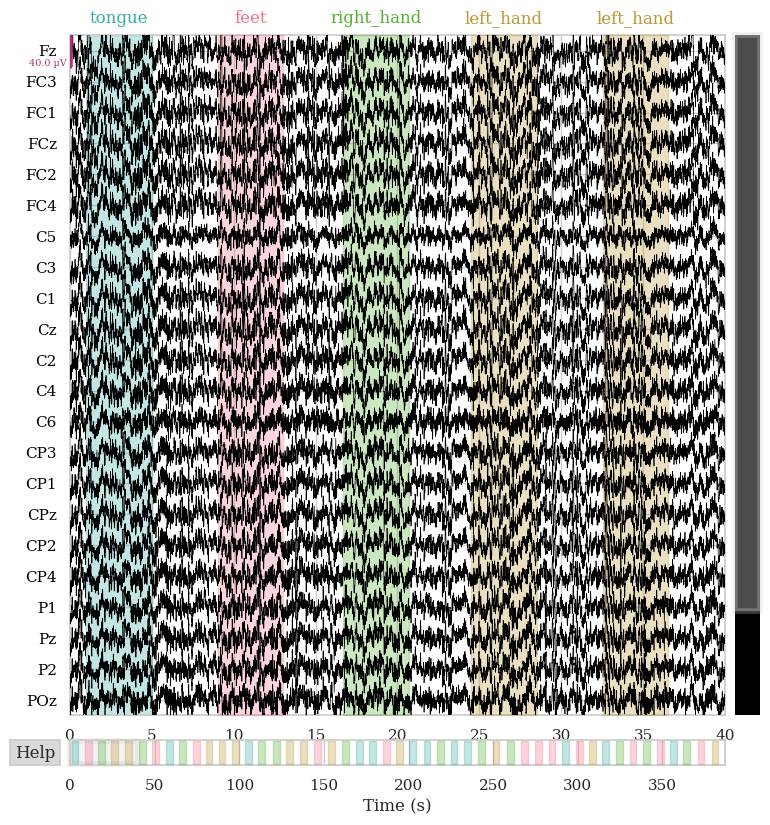

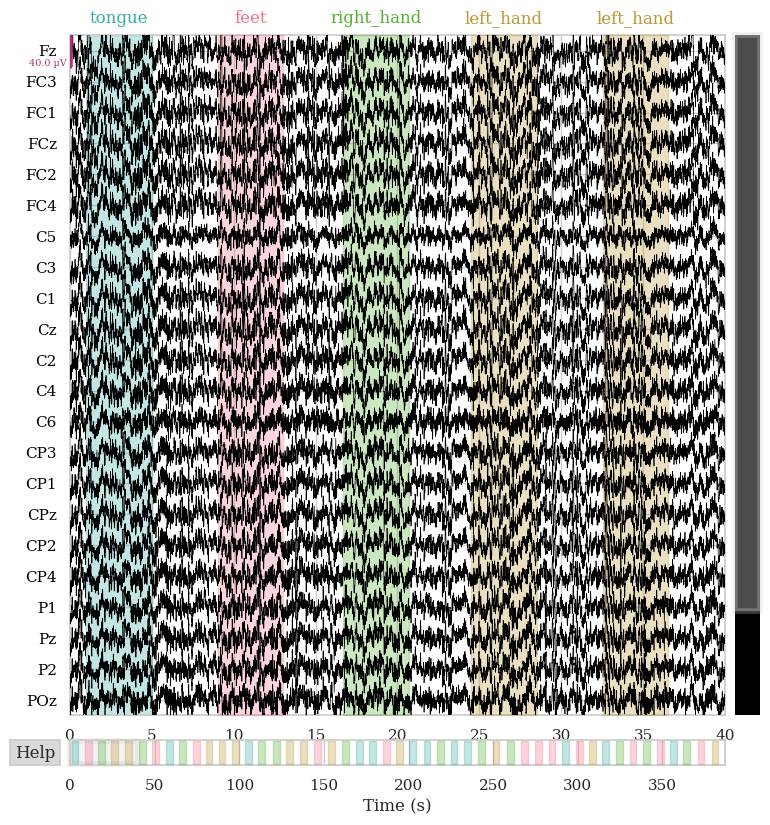

In [15]:
raw.plot(duration=40, n_channels=22)

<h1>Calcul de la Covariance :</h1> 
À partir des données EEG, la covariance est calculée toutes les deux secondes. Cela permet de capturer les relations linéaires entre les différentes électrodes à travers le temps.
Il existe plusieur méthode dans mne pourle calcule de la covariance parmis ces méthodes il  y'a la méthode empirique ainsi que ‘diagonal_fixed’, ‘shrunk’, ‘oas’, ‘ledoit_wolf’, ‘factor_analysis’, ‘shrinkage’. Dans cette exemple je vais utiliser la méthode empirique.

<h1>Enregistrement des Matrices de Covariance :</h1> Chaque matrice de covariance est sauvegardée dans une varible figure_list ainsi qu'au format JPG pour créer un GIF animé illustrant l'évolution de la covariance dans le temps.

In [16]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt

In [28]:
import matplotlib.pyplot as plt
def afficher_cov_temp(matrice, t_list=[]):
    plt.imshow(matrice, cmap='Reds', aspect='auto')
    plt.xticks(np.arange(len(t_list)), t_list)
    plt.yticks([])
    plt.title("Matrice de cov dans le temps")
    plt.xlabel("temps")
    plt.ylabel("valeur matrices")
    plt.colorbar()  # Ajouter une barre de couleur pour la référence
    plt.show()

Using up to 10 segments
Number of samples used : 500
[done]


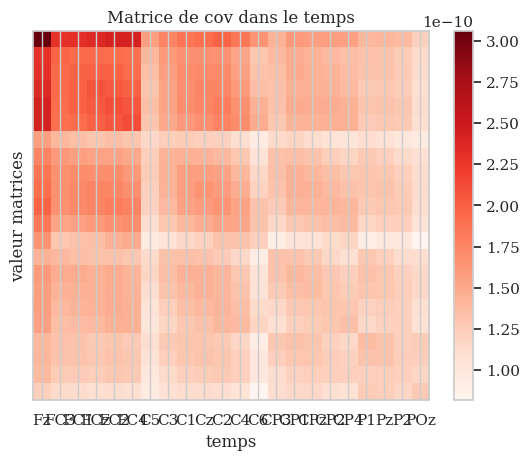

In [33]:
t_list= ['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']
afficher_cov_temp(mne.compute_raw_covariance(raw, tmin=0, tmax=2, method='empirical').data,t_list)

In [31]:
print(mne.compute_raw_covariance(raw, tmin=0, tmax=1, method='empirical').data)

Using up to 5 segments
Number of samples used : 250
[done]
[[1.62813911e-10 1.43309941e-10 1.51345499e-10 1.49696061e-10
  1.56993409e-10 1.49148781e-10 1.07524777e-10 1.25605340e-10
  1.40545232e-10 1.47877190e-10 1.47967951e-10 1.36829965e-10
  1.03736823e-10 1.20060858e-10 1.34527879e-10 1.37196283e-10
  1.32671302e-10 1.30199120e-10 1.25543945e-10 1.29074126e-10
  1.23835139e-10 1.14277036e-10]
 [1.43309941e-10 1.51599788e-10 1.47928337e-10 1.39359930e-10
  1.41374045e-10 1.34882394e-10 1.20560122e-10 1.43111890e-10
  1.48404281e-10 1.50449380e-10 1.41761987e-10 1.32090420e-10
  9.63796557e-11 1.40597050e-10 1.47017398e-10 1.47276206e-10
  1.35739479e-10 1.30347790e-10 1.43017612e-10 1.41802883e-10
  1.32020313e-10 1.27011931e-10]
 [1.51345499e-10 1.47928337e-10 1.52410241e-10 1.45858235e-10
  1.51198970e-10 1.42369798e-10 1.16236965e-10 1.37284847e-10
  1.49978703e-10 1.53790372e-10 1.49758828e-10 1.37651649e-10
  1.03764752e-10 1.33884507e-10 1.46652766e-10 1.46939429e-10
  1.391

In [76]:
import matplotlib.pyplot as plt
import mne

# Créer une liste pour stocker les figures
vect_cov_list = []
label_list = []

# Définir les paramètres de temps
tmin = 0  # Temps minimum initial
tmax = 1  # Temps maximum initial
step = 1  # Pas de décalage en secondes
num_segments = 40  # Nombre total de segments


# Boucle pour créer les figures
for i in range(num_segments):
        # Calculer le temps de début et de fin pour chaque segment
        segment_tmin = tmin + i * step
        segment_tmax = tmax + i * step        
        # Extraire le segment de données brut correspondant
        raw_segment = raw.copy().crop(tmin=segment_tmin, tmax=segment_tmax)
        
        # Calculer la covariance pour ce segment
        cov_segment = mne.compute_raw_covariance(raw_segment, tmin=0, tmax=2, method='empirical')
        # Récupérer le label correspondant à ce segment
        events = mne.events_from_annotations(raw_segment)
        if events[0].size != 0:
                label = list(events[1].keys())[0]
                label_list.append(label)
        else:
                label = "No label"
                label_list.append(label)

        
        # Ajouter le vecteur de la matrice à la liste
        vect_cov_list.append(cov_segment)


Using up to 5 segments


Number of samples used : 250
[done]
Used Annotations descriptions: ['tongue']
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['tongue']
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['tongue']
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['tongue']
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['tongue']
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['tongue']
Using up to 5 segments
Number of samples used : 250
[done]
Using up to 5 segments
Number of samples used : 250
[done]
Using up to 5 segments
Number of samples used : 250
[done]
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['feet']
Using up to 5 segments
Number of samples used : 250
[done]
Used Annotations descriptions: ['feet']
Using up to 5 segments
Number of samples u

In [60]:
import pyriemann

In [61]:
cov_list = [cov.data for cov in vect_cov_list]

In [62]:
print(np.array(cov_list).shape)

(40, 22, 22)


In [63]:
print(vect_cov_list)

[<Covariance | kind : full, shape : (22, 22), range : [+8e-11, +1.7e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+7.3e-11, +4.5e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+1.8e-11, +9.1e-11], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+4.9e-11, +2.2e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+3.9e-11, +1.5e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+4.6e-11, +1.5e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+2.1e-11, +1.5e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+3.8e-11, +1.2e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+1.1e-11, +8.5e-11], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+6e-11, +1.7e-10], n_samples : 249>, <Covariance | kind : full, shape : (22, 22), range : [+1.7e-11, +1.3e-10]

In [64]:
Delta0 =ProjC1C0 = tangent_space_projection(cov_list[0], cov_list[1])

In [65]:
ProjC2C1 = tangent_space_projection(cov_list[1], cov_list[2])
Delta0=transport_vector(ProjC1C0, cov_list[2],cov_list[1] )

In [66]:
# Importation des bibliothèques nécessaires
import numpy as np
from pyriemann.utils.base import logm
from scipy.linalg import sqrtm

def tangent_space_projection(A, B):
    
    # Calcul de la racine carrée de B
    sqrt_B = sqrtm(B)

    # Calcul de B^(-1/2)
    sqrt_inv_B = np.linalg.inv(sqrt_B)

    # Calcul de B^(1/2) A B^(-1/2)
    transformed_A = np.dot(np.dot(sqrt_inv_B, A), sqrt_inv_B)

    # Calcul du logarithme matriciel de B^(1/2) A B^(-1/2)
    log_transformed_A = logm(transformed_A)

    # Projet dans l'espace tangent de B
    tangent_space_A = np.dot(np.dot(sqrt_B, log_transformed_A), sqrt_B)

    return tangent_space_A



In [67]:
# Importation des bibliothèques nécessaires
import numpy as np
from pyriemann.utils.base import expm
from scipy.linalg import sqrtm

def inverse_tangent_space_projection(ProjB_A, B):
    # Calcul de la racine carrée de B
    sqrt_B = sqrtm(B)
    # Calcul de B^(-1/2)
    sqrt_inv_B = np.linalg.inv(sqrt_B)
    # Calcul de B^(-1/2) * ProjB_A * B^(-1/2)
    transformed_ProjB_A = np.dot(np.dot(sqrt_inv_B, ProjB_A), sqrt_inv_B)
    # Calcul de l'exponentielle matricielle de B^(-1/2) * ProjB_A * B^(-1/2)
    exp_transformed_ProjB_A = expm(transformed_ProjB_A)
    # Revenir à l'espace original
    original_A = np.dot(np.dot(sqrt_B, exp_transformed_ProjB_A), sqrt_B)
    return original_A



In [68]:
# Importation des bibliothèques nécessaires
import numpy as np
from scipy.linalg import sqrtm

def transport_vector(Delta, A, B):
    # Calcul de l'inverse de B
    inv_B = np.linalg.inv(B)
    # Calcul de A * B^(-1)
    A_invB = np.dot(A, inv_B)
    # Calcul de E = (A * B^(-1))^(1/2)
    E = sqrtm(A_invB)
    # Transport de Delta du plan tangent T_B vers T_A en utilisant la transposée de E
    transported_Delta = np.dot(np.dot(E, Delta), E.T)
    return transported_Delta



In [69]:
# Liste pour stocker les projections
projections = []
n=len(cov_list)
# Calcul des projections pour chaque paire de matrices consécutives
for i in range(n - 1):
    A = np.array(cov_list[i])
    B = np.array(cov_list[i + 1])
    projected_A = tangent_space_projection(A, B)
    projections.append(projected_A)
# Ajouter la dernière matrice de covariance à la liste des projections
projections.append(cov_list[-1])
# Calcul des vecteurs transportés vers le dernier plan pour chaque paire de matrices consécutives
for i in range(n - 2):
    for j in range(i + 1, n-1):
        projections[i]= transport_vector(projections[i], cov_list[j+1], cov_list[j])

In [73]:
# Ajouter les cinq premières projections
sum_of_projections=np.zeros_like(projections[0])
for projection in projections[:5]:
    sum_of_projections += projection